In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import seaborn as sn
import matplotlib.pyplot as plt

In [6]:
X_data = np.loadtxt("data/X_data.csv", delimiter=",")
X_data.shape

(1000, 38400)

In [7]:
X_data

array([[  0.28048742,   3.72830677,   3.19126654, ..., -45.90468216,
        -45.90468216, -42.39907837],
       [ -2.58110476,  13.3120842 ,   2.01552916, ..., -49.64926147,
        -49.64926147, -37.44506454],
       [ -2.15358114,  -7.61195707,  -4.13224602, ..., -50.49839783,
        -50.49839783, -35.67107391],
       ...,
       [-15.86331844, -12.50350857, -28.52645874, ..., -58.88102722,
        -58.88102722, -31.27197647],
       [ -4.51956177,  -9.57658386,  -3.12049174, ..., -54.87487793,
        -54.87487793, -51.62145996],
       [-21.03319359, -23.70036888, -20.64584732, ..., -60.84477997,
        -60.84477997, -60.84477997]])

In [15]:
y_data = np.loadtxt("data/y_data.csv", dtype=str)
y_data.shape

(1000,)

In [12]:
y_data

array(['blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blu

In [14]:
labels = np.unique(y_data)
labels

array(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae', 'rock'], dtype='<U9')

In [64]:
y_data2 = np.zeros((y_data.shape[0], len(labels)))

for i, label in enumerate(labels):
    for j in range(y_data.shape[0]):
        if y_data[j] == label:
            y_data2[j][i] = 1
            
y_data2

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [41]:
X_data2 = X_data.reshape(1000, 128, 300)
X_data2

array([[[  0.28048742,   3.72830677,   3.19126654, ...,   6.14212751,
          -1.98371422,  12.92064667],
        [  3.10127735,  14.22969437,  11.79866219, ...,  10.4456377 ,
           5.20716858,  15.11762428],
        [ -4.39976215,  10.78109169,  12.30222225, ...,  -0.17950238,
           6.4920702 ,  13.78956223],
        ...,
        [-45.90468216, -45.90468216, -45.90468216, ..., -45.90468216,
         -45.90468216, -42.06035614],
        [-45.90468216, -45.90468216, -45.90468216, ..., -45.90468216,
         -45.90468216, -42.29415131],
        [-45.90468216, -45.90468216, -45.90468216, ..., -45.90468216,
         -45.90468216, -42.39907837]],

       [[ -2.58110476,  13.3120842 ,   2.01552916, ...,   0.45536363,
          12.62303734,   9.48605347],
        [ -1.35699916,  24.61754227,  13.61273861, ...,   8.17651463,
          18.54008102,  16.74104881],
        [ -7.55361128,  19.53930855,  14.08666611, ...,   8.84458733,
          11.41815948,  13.66756248],
        ...,


In [43]:
X_data2 = X_data2.reshape(1000, 128, 300, 1)
X_data2.shape

(1000, 128, 300, 1)

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data2, y_data2, test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 128, 300, 1)
(200, 128, 300, 1)
(800, 10)
(200, 10)


In [72]:
def conv_block(x, n_filters,filter_size=(3, 3), pool_size=(2, 2),stride=(1, 1)):
    x = keras.layers.Conv2D(n_filters, filter_size, strides=(1, 1), padding='same')(x)
    x = keras.layers.Activation('relu')(x)
    x = keras.layers.MaxPooling2D(pool_size=pool_size, strides=stride)(x)
    x = keras.layers.Dropout(0.4)(x)
    return x

In [73]:
nn_input = keras.Input(shape=(128,300,1))

In [74]:
x = conv_block(nn_input, 16,stride=(2,2))
x = conv_block(x, 32,filter_size=(3,3),stride=(2,2))
x = conv_block(x, 64, stride=(2,2))
x = conv_block(x, 128,filter_size=(3,3),stride=(2,2))
x = conv_block(x, 256,stride=(2,2))

x = keras.layers.Flatten()(x)
x = keras.layers.Dropout(0.5)(x)
x = keras.layers.Dense(128, activation='relu', 
          kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)
x = keras.layers.Dropout(0.3)(x)
predictions = keras.layers.Dense(len(labels), 
                        activation='softmax', 
                        kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)
    
model = keras.Model(inputs=nn_input, outputs=predictions)

In [75]:
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 128, 300, 1)]     0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 128, 300, 16)      160       
_________________________________________________________________
activation_31 (Activation)   (None, 128, 300, 16)      0         
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 64, 150, 16)       0         
_________________________________________________________________
dropout_39 (Dropout)         (None, 64, 150, 16)       0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 64, 150, 32)       4640      
_________________________________________________________________
activation_32 (Activation)   (None, 64, 150, 32)      

In [76]:
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [77]:
X_train.shape

(800, 128, 300, 1)

In [78]:
y_train.shape

(800, 10)

In [140]:
epochs=100

for epoch in range(epochs):

    history = model.fit(
      X_train,
      y_train,
      epochs=1, 
      batch_size=32,
      validation_split=0.10
        )

23/23 [==============================] - 23s 987ms/step - loss: 1.3213 - accuracy: 0.8000 - val_loss: 1.9932 - val_accuracy: 0.5625


In [141]:
score = model.evaluate(X_test, y_test, verbose=0)
print("val_loss = {:.3f} and val_acc = {:.3f}".format(score[0], score[1]))

val_loss = 1.909 and val_acc = 0.600


In [142]:
y_predicted = np.zeros((200, 10))
for i, y in enumerate(y_test):
    out = model.predict([ X_test[i].reshape((-1, 128, 300, 1)) ])
    y_predicted[i][np.argmax(out)] = 1

In [143]:
y_predicted.shape

(200, 10)

In [144]:
y_predicted[:30]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 

In [145]:
m = tf.keras.metrics.BinaryAccuracy()
m.update_state(y_test, y_predicted)
m.result().numpy()

0.9199999

In [146]:
m = tf.keras.metrics.Precision()
m.update_state(y_test, y_predicted)
precision = m.result().numpy()
precision

0.6

In [147]:
m = tf.keras.metrics.Recall()
m.update_state(y_test, y_predicted)
recall = m.result().numpy()
recall

0.6

In [148]:
f1_score = 2 * ( (precision * recall) / (precision + recall) )
f1_score

0.6000000238418579

In [152]:
y_test

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [153]:
y_test2 = y_test.argmax(1)
y_test2

array([2, 4, 8, 5, 0, 1, 6, 9, 9, 0, 1, 2, 8, 3, 9, 7, 3, 5, 1, 2, 6, 4,
       8, 4, 3, 8, 5, 4, 5, 8, 7, 9, 3, 2, 9, 5, 4, 3, 8, 8, 8, 8, 6, 5,
       6, 9, 3, 6, 2, 7, 4, 4, 5, 2, 2, 5, 2, 8, 9, 2, 9, 5, 6, 3, 2, 7,
       2, 6, 7, 6, 7, 4, 6, 3, 7, 6, 8, 8, 1, 0, 1, 4, 1, 1, 0, 0, 3, 5,
       6, 7, 6, 0, 8, 0, 7, 3, 7, 7, 8, 5, 9, 5, 7, 2, 6, 5, 3, 6, 9, 7,
       1, 1, 8, 0, 8, 1, 7, 4, 4, 7, 8, 3, 2, 3, 1, 8, 6, 3, 8, 6, 0, 3,
       4, 7, 7, 2, 0, 2, 5, 9, 5, 4, 6, 9, 1, 0, 6, 8, 4, 3, 1, 9, 4, 4,
       3, 0, 8, 0, 0, 1, 7, 0, 3, 6, 0, 9, 0, 5, 4, 1, 4, 3, 4, 1, 2, 1,
       2, 4, 6, 7, 7, 4, 3, 8, 6, 0, 0, 9, 6, 2, 6, 7, 0, 0, 9, 8, 3, 3,
       5, 2], dtype=int64)

In [154]:
y_predicted2 = y_predicted.argmax(1)
y_predicted2

array([9, 4, 8, 5, 9, 1, 6, 5, 9, 0, 3, 2, 3, 6, 9, 4, 8, 5, 1, 9, 6, 4,
       8, 4, 9, 4, 5, 4, 5, 9, 0, 9, 3, 2, 9, 9, 4, 9, 9, 8, 3, 8, 6, 5,
       9, 6, 4, 6, 9, 7, 4, 4, 5, 2, 5, 5, 2, 3, 9, 9, 9, 8, 6, 3, 9, 2,
       9, 6, 7, 6, 4, 4, 9, 4, 3, 6, 8, 4, 1, 0, 1, 4, 1, 1, 9, 2, 4, 5,
       6, 9, 6, 9, 8, 0, 8, 9, 4, 9, 8, 2, 4, 5, 4, 2, 6, 1, 3, 6, 9, 3,
       1, 1, 9, 5, 4, 1, 1, 4, 4, 2, 8, 3, 2, 9, 1, 8, 6, 0, 8, 6, 9, 3,
       4, 2, 4, 2, 5, 9, 5, 9, 5, 4, 6, 9, 1, 0, 6, 8, 4, 9, 1, 0, 4, 4,
       3, 6, 5, 0, 0, 1, 8, 9, 4, 6, 2, 9, 0, 5, 4, 1, 4, 6, 4, 1, 2, 1,
       2, 4, 9, 3, 7, 4, 3, 8, 6, 5, 9, 6, 6, 0, 6, 7, 5, 9, 9, 2, 9, 4,
       5, 3], dtype=int64)

In [155]:
cm = tf.math.confusion_matrix(y_test2, y_predicted2, 10)
print(cm)

tf.Tensor(
[[ 7  0  2  0  0  4  1  0  0  7]
 [ 0 16  0  1  0  0  0  0  0  0]
 [ 1  0  9  1  0  1  0  0  0  7]
 [ 1  0  0  7  5  0  2  0  1  6]
 [ 0  0  0  0 21  0  0  0  0  0]
 [ 0  1  1  0  0 13  0  0  1  1]
 [ 0  0  0  0  0  0 20  0  0  3]
 [ 1  1  3  3  5  0  0  4  2  2]
 [ 0  0  1  3  3  1  0  0 12  3]
 [ 1  0  0  0  1  1  2  0  0 11]], shape=(10, 10), dtype=int32)


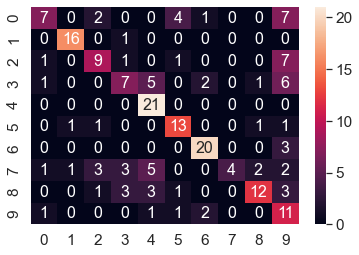

In [156]:
df_cm = pd.DataFrame(cm, range(10), range(10))
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()